<a href="https://colab.research.google.com/github/bintangkw/Data-Analytic-Ecommerce-Dataset/blob/main/Regresi_Logistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Import Library

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


##2. Preprocessing

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ANALITIK DATA 2/Tubes/Pakistan Largest Ecommerce Dataset (1).xlsx')
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,M-Y,FY,Customer ID,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
0,211131,complete,2016-01-07,kreations_YI 06-L,1950.0,1,1950.0,100147443,Women's Fashion,\N,...,2016-07-01,FY17,1,Ya,Shopee,Ya,"Penjual tidak merespons, Ulasan penjual/produk...",Sangat puas,setuju,sangat setuju
1,211133,canceled,2016-01-07,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1,240.0,100147444,Beauty & Grooming,\N,...,2016-07-01,FY17,2,Ya,Shopee,Ya,"Ulasan penjual/produk buruk, proses pengiriman...",Sangat Setuju,Setuju,Setuju
2,211134,canceled,2016-01-07,Ego_UP0017-999-MR0,2450.0,1,2450.0,100147445,Women's Fashion,\N,...,2016-07-01,FY17,3,Ya,Tokopedia,Ya,Perubahan kebutuhan atau keinginan,Setuju,Netral,Netral
3,211135,complete,2016-01-07,kcc_krone deal,360.0,1,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,2016-07-01,FY17,4,Ya,Shopee,Ya,proses pengiriman yang lama,Sangat Setuju,Sangat Setuju,Setuju
4,211136,order_refunded,2016-01-07,BK7010400AG,555.0,2,1110.0,100147447,Soghaat,\N,...,2016-07-01,FY17,5,Ya,Tokopedia,Ya,Penjual tidak merespons,Sangat Setuju,Tidak setuju,Setuju


##3. Data Understanding

In [ ]:
df.describe()

,item_id,created_at,price,qty_ordered,grand_total,increment_id,discount_amount,Working Date,MV,Year,Month,M-Y,Customer ID
count,349.000000,349,349.000000,349.000000,349.000000,3.490000e+02,349.000000,349,349.000000,349.0,349.0,349,349.000000
mean,211322.171920,2016-01-07 00:00:00,1971.284384,1.111748,2356.792980,1.001476e+08,7.163324,2016-01-07 00:00:00,2053.916905,2016.0,7.0,2016-07-01 00:00:00,47.355301
min,211131.000000,2016-01-07 00:00:00,1.000000,1.000000,0.000000,1.001474e+08,0.000000,2016-01-07 00:00:00,1.000000,2016.0,7.0,2016-07-01 00:00:00,1.000000
25%,211230.000000,2016-01-07 00:00:00,260.000000,1.000000,323.000000,1.001475e+08,0.000000,2016-01-07 00:00:00,288.000000,2016.0,7.0,2016-07-01 00:00:00,33.000000
50%,211322.000000,2016-01-07 00:00:00,360.000000,1.000000,366.000000,1.001476e+08,0.000000,2016-01-07 00:00:00,360.000000,2016.0,7.0,2016-07-01 00:00:00,43.000000
75%,211415.000000,2016-01-07 00:00:00,555.000000,1.000000,1099.000000,1.001476e+08,0.000000,2016-01-07 00:00:00,760.000000,2016.0,7.0,2016-07-01 00:00:00,59.000000
max,211510.000000,2016-01-07 00:00:00,96499.000000,6.000000,96499.000000,1.001477e+08,300.000000,2016-01-07 00:00:00,96499.000000,2016.0,7.0,2016-07-01 00:00:00,107.000000
std,108.891458,NaN,8863.822520,0.532404,9049.218907,7.909405e+01,36.127042,NaN,8935.456510,0.0,0.0,NaN,23.950376


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1VtGw57WV5f3IUiGGNmHj0Lvi411AXHXAiP_Zd0de-iA/edit#gid=0


In [ ]:
df['status'].value_counts()

,count
status,
complete,230
canceled,50
order_refunded,49
received,13
refund,7


##4. Cleaning Data

In [ ]:
df = df.drop(columns=['Working Date'])
df = df.drop(columns=['Customer ID'])
df = df.drop(columns=['created_at'])
df = df.drop(columns=['Customer Since'])
df = df.drop(columns=['M-Y'])
df = df.drop(columns=['item_id'])
df = df.drop(columns=['increment_id'])

In [ ]:
df.isnull().sum()

,0
status,0
sku,0
price,0
qty_ordered,0
grand_total,0
category_name_1,0
sales_commission_code,0
discount_amount,0
payment_method,0
BI Status,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)
    df[column] = label_encoder.fit_transform(df[column])
df

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,...,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
1,0,12,240.00,1,240.00,1,3,0.0,0,0,...,2016,7,0,0,1,0,9,0,2,2
2,0,5,2450.00,1,2450.00,6,3,0.0,0,0,...,2016,7,0,0,3,0,5,1,0,0
3,1,15,360.00,1,60.00,1,1,300.0,0,1,...,2016,7,0,0,1,0,10,0,1,2
4,2,4,555.00,2,1110.00,5,3,0.0,0,2,...,2016,7,0,0,3,0,2,0,3,2
5,0,9,80.00,1,80.00,5,3,0.0,0,0,...,2016,7,0,0,2,0,6,0,0,1
6,1,15,360.00,1,60.00,1,3,300.0,0,1,...,2016,7,0,0,0,0,2,0,2,1
7,1,10,170.00,1,170.00,5,3,0.0,0,1,...,2016,7,0,0,1,0,10,0,1,1
8,0,0,96499.00,1,96499.00,4,3,0.0,3,0,...,2016,7,0,0,3,0,1,0,1,1
9,0,0,96499.00,1,96499.00,4,3,0.0,2,0,...,2016,7,0,0,1,0,0,0,1,1
10,1,6,5500.00,1,5500.00,0,3,0.0,0,1,...,2016,7,0,0,3,0,0,0,1,1


In [ ]:
df['status'] = df['status'].apply(lambda x: 1 if x in [1, 3] else 0)
df

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,...,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
1,0,12,240.00,1,240.00,1,3,0.0,0,0,...,2016,7,0,0,1,0,9,0,2,2
2,0,5,2450.00,1,2450.00,6,3,0.0,0,0,...,2016,7,0,0,3,0,5,1,0,0
3,1,15,360.00,1,60.00,1,1,300.0,0,1,...,2016,7,0,0,1,0,10,0,1,2
4,0,4,555.00,2,1110.00,5,3,0.0,0,2,...,2016,7,0,0,3,0,2,0,3,2
5,0,9,80.00,1,80.00,5,3,0.0,0,0,...,2016,7,0,0,2,0,6,0,0,1
6,1,15,360.00,1,60.00,1,3,300.0,0,1,...,2016,7,0,0,0,0,2,0,2,1
7,1,10,170.00,1,170.00,5,3,0.0,0,1,...,2016,7,0,0,1,0,10,0,1,1
8,0,0,96499.00,1,96499.00,4,3,0.0,3,0,...,2016,7,0,0,3,0,1,0,1,1
9,0,0,96499.00,1,96499.00,4,3,0.0,2,0,...,2016,7,0,0,1,0,0,0,1,1
10,1,6,5500.00,1,5500.00,0,3,0.0,0,1,...,2016,7,0,0,3,0,0,0,1,1


##5. Eksplorasi Data Analysis (EDA)

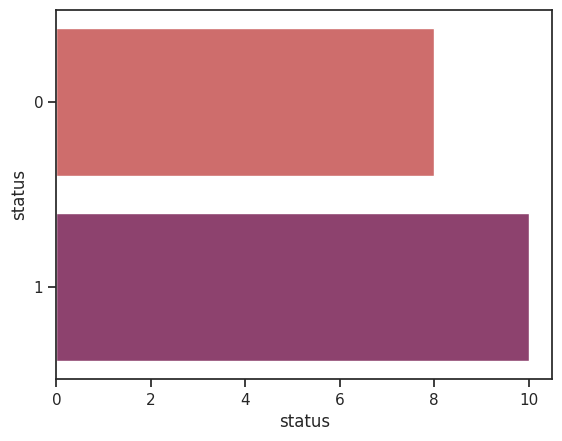

In [ ]:
import warnings #menambahkan library warnings
warnings.filterwarnings("ignore")
sns.set_theme(style='ticks') #mengatur tema visualisasi
sns.countplot(y='status', data=df, palette='flare')
plt.xlabel('status')
plt.show()

In [ ]:
import sklearn.model_selection as ms
x = df[['sku','price','qty_ordered','grand_total','category_name_1','sales_commission_code','discount_amount','payment_method','BI Status',' MV ','Year','Month','FY',' Apakah Anda sering berbelanja di platform e-commerce?  ',' Platform e-commerce mana yang paling sering Anda gunakan?  ','Apakah Anda pernah membatalkan pesanan di e-commerce?',' Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu)  ','Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?  ',' Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?',' jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?  ']]
y = df['status']
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.3, random_state=30)

##6. Modeling (Regresi Logistik)

In [ ]:
df.head()

,status,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,...,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
1,0,12,240.0,1,240.0,1,3,0.0,0,0,...,2016,7,0,0,1,0,9,0,2,2
2,0,5,2450.0,1,2450.0,6,3,0.0,0,0,...,2016,7,0,0,3,0,5,1,0,0
3,1,15,360.0,1,60.0,1,1,300.0,0,1,...,2016,7,0,0,1,0,10,0,1,2
4,0,4,555.0,2,1110.0,5,3,0.0,0,2,...,2016,7,0,0,3,0,2,0,3,2
5,0,9,80.0,1,80.0,5,3,0.0,0,0,...,2016,7,0,0,2,0,6,0,0,1


In [ ]:
import sklearn.linear_model as lm
model = lm.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[ 8.59800749e-01, -2.77409456e-03, -7.20476617e-05,
         4.63345045e-03, -1.87625643e-01, -2.33153883e-01,
         2.08668122e-02,  1.24520594e-01,  4.94233974e-01,
        -1.03275184e-02, -3.24586627e-03, -1.12703690e-05,
         0.00000000e+00,  0.00000000e+00, -3.68422738e-01,
         0.00000000e+00,  2.09525468e-01, -9.16112743e-02,
         2.84399115e-01,  6.15831267e-02]])

In [ ]:
y_prediksi = model.predict(X_test)
print(y_prediksi)

[1 0 0 0 0 0]


In [ ]:
X_test.head()

,sku,price,qty_ordered,grand_total,category_name_1,sales_commission_code,discount_amount,payment_method,BI Status,MV,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
1,12,240.0,1,240.0,1,3,0.0,0,0,240,2016,7,0,0,1,0,9,0,2,2
11,2,210.0,1,366.0,5,3,0.0,0,2,210,2016,7,0,0,1,0,0,0,1,1
12,3,156.0,1,366.0,5,3,0.0,0,2,156,2016,7,0,0,3,0,10,0,1,1
15,1,1550.0,1,1550.0,3,0,0.0,3,0,1550,2016,7,0,0,2,0,8,0,1,1
10,6,5500.0,1,5500.0,0,3,0.0,0,1,5500,2016,7,0,0,3,0,0,0,1,1


In [ ]:
y_test.head(1)

,status
1,0


In [ ]:
import sklearn.metrics as met
cofusionmatrix = met.confusion_matrix(y_test, y_prediksi)
print(cofusionmatrix)

[[2 1]
 [3 0]]


In [ ]:
score = model.score(X_test, y_test)
print(score)

0.3333333333333333


In [ ]:
precesion = met.precision_score(y_test, y_prediksi)
print(precesion)

0.0


In [ ]:
auc = met.roc_auc_score(y_test, model.predict(X_test))
print(auc)

0.33333333333333337


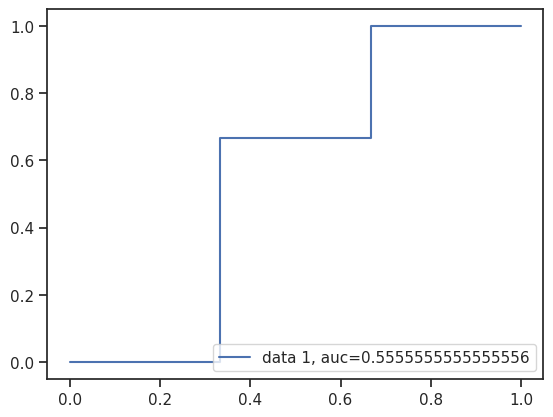

In [ ]:
import matplotlib.pyplot as plt
y_pred_prob = model.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_prob)
auc = met.roc_auc_score(y_test, y_pred_prob)
plt.plot(fp, tp, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
testing1 = pd.DataFrame({
    'price': [500],
    'grand_total': [370],
    'category_name_1': [7],
    'payment_method': [1],
    'BI Status' : [0],
    'sku' : [131],
    ' MV ' : [300],
    'qty_ordered': [0],
    'sales_commission_code': [0],
    'discount_amount': [0],
    'Year': [0],
    'Month': [0],
    'FY': [0],
    ' Apakah Anda sering berbelanja di platform e-commerce?  ' : [0],
    ' Platform e-commerce mana yang paling sering Anda gunakan?  ' : [0],
    'Apakah Anda pernah membatalkan pesanan di e-commerce?' : [1],
    ' Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu)  ' : [5],
    'Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?  ' : [0],
    ' Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?' : [1],
    ' jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?  ': [2]
})

testing1 = pd.DataFrame(testing1)
testing1

,price,grand_total,category_name_1,payment_method,BI Status,sku,MV,qty_ordered,sales_commission_code,discount_amount,Year,Month,FY,Apakah Anda sering berbelanja di platform e-commerce?,Platform e-commerce mana yang paling sering Anda gunakan?,Apakah Anda pernah membatalkan pesanan di e-commerce?,Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu),Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?,Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?,jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?
0,500,370,7,1,0,131,300,0,0,0,0,0,0,0,0,1,5,0,1,2


In [ ]:
testing1 = testing1[df[['sku','price','qty_ordered','grand_total','category_name_1','sales_commission_code','discount_amount','payment_method','BI Status',' MV ','Year','Month','FY',' Apakah Anda sering berbelanja di platform e-commerce?  ',' Platform e-commerce mana yang paling sering Anda gunakan?  ','Apakah Anda pernah membatalkan pesanan di e-commerce?',' Apa alasan utama Anda membatalkan pesanan? (Bisa pilih lebih dari satu)  ','Apakah kecepatan pengiriman barang mempengaruhi anda untuk melakukan pembelian barang selanjutnya?  ',' Rating dan ulasan produk mempengaruhi terhadap keputusan pembatalan pesanan Anda?',' jika tidak mendapatkan update status pengiriman dalam 24 jam apakah mempengaruhi pembatalan pesanan Anda ?  ']].columns]
pred_coba = model.predict(testing1)
print('pesanan yang berpotensi dibatalkan sebelum pengiriman : ')
print(pred_coba)

pesanan yang berpotensi dibatalkan sebelum pengiriman : 
[1]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print("Regresi Logistik:")
print(classification_report(y_test, y_prediksi))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Regresi Logistik:
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.00      0.00      0.00         3

    accuracy                           0.33         6
   macro avg       0.20      0.33      0.25         6
weighted avg       0.20      0.33      0.25         6

AUC-ROC: 0.5555555555555556


In [ ]:
accuracy = accuracy_score(y_test, y_prediksi)
print(f"Akurasi : {accuracy:.2f}")
precision = precision_score(y_test, y_prediksi)
print(f"Presisi : {precision:.2f}")
recall = recall_score(y_test, y_prediksi)
print(f"Recall  : {recall:.2f}")
f1 = f1_score(y_test, y_prediksi)
print(f"F1-Score: {f1:.2f}")
auc = met.roc_auc_score(y_test, y_prediksi)
print(f"AUC-ROC : {auc:.2f}")

Akurasi : 0.33
Presisi : 0.00
Recall  : 0.00
F1-Score: 0.00
AUC-ROC : 0.33
